In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
import csv
input_file_path = 'train_data.txt'
output_csv_path = 'train_data.csv'
with open(input_file_path, 'r') as file:
    lines = file.readlines()
data = [line.strip().split() for line in lines]
with open(output_csv_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    csv_writer.writerows(data)
print(f'Data successfully written to {output_csv_path}')


Data successfully written to train_data.csv


In [3]:
input_file_path = 'test_data.txt'
output_csv_path = 'test_data.csv'
with open(input_file_path, 'r') as file:
    lines = file.readlines()
data = [line.strip().split() for line in lines]
with open(output_csv_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    csv_writer.writerows(data)
print(f'Data successfully written to {output_csv_path}')


Data successfully written to test_data.csv


In [4]:
input_file_path = 'test_data_solution.txt'
output_csv_path = 'test_data_solution.csv'
with open(input_file_path, 'r') as file:
    lines = file.readlines()
data = [line.strip().split() for line in lines]
with open(output_csv_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    csv_writer.writerows(data)
print(f'Data successfully written to {output_csv_path}')


Data successfully written to test_data_solution.csv


In [5]:
train=pd.read_csv("train_data.csv", sep=',:::,',names=['Title','Genre','Description'],engine='python')
train.head()

,Title,Genre,Description
1,"Oscar,et,la,dame,rose,(2009)",drama,"Listening,in,to,a,conversation,between,his,doc..."
2,"Cupid,(1997)",thriller,"A,brother,and,sister,with,a,past,incestuous,re..."
3,"""Young,"",Wild,and,Wonderful,(1980)",adult,"As,the,bus,empties,the,students,for,their,fiel..."
4,"The,Secret,Sin,(1915)",drama,"To,help,their,unemployed,father,make,ends,""mee..."
5,"The,Unrecovered,(2007)",drama,"The,film's,title,refers,not,only,to,the,un-rec..."


In [6]:
test=pd.read_csv("test_data.csv", sep=',:::,',names=['Title','Genre','Description'],engine='python')
test.head()

test_solution=pd.read_csv("test_data_solution.csv", sep=',:::,',names=['Title','Actual_Genre','Description'],engine='python')
test_solution.drop(test_solution.columns[[0,2]],axis=1,inplace=True)

test_solution.head()

,Actual_Genre
1,thriller
2,comedy
3,documentary
4,drama
5,drama


In [24]:
train.Genre.value_counts()

Genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

Text(0, 0.5, 'Genres')

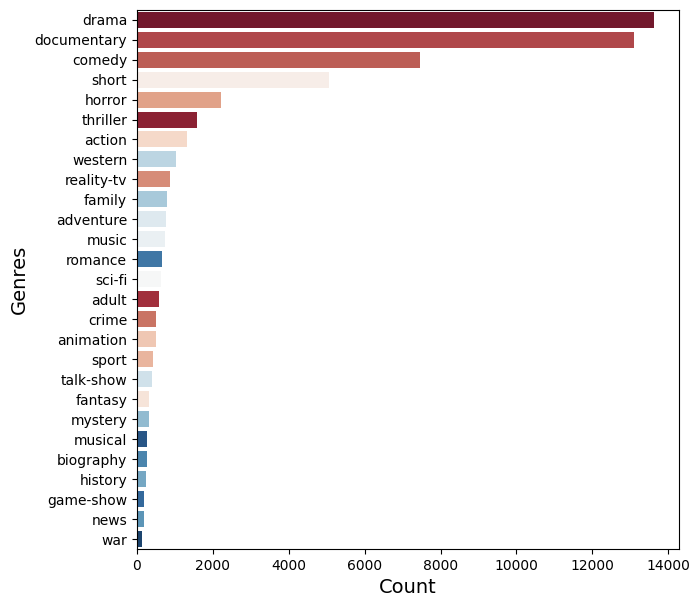

In [7]:
plt.figure(figsize=(7, 7))
sns.countplot(data=train, y='Genre',hue='Genre', order=train['Genre'].value_counts().index, palette='RdBu',legend=False)
plt.xlabel('Count', fontsize=14, fontweight='normal')
plt.ylabel('Genres', fontsize=14, fontweight='normal')

In [8]:
print(train.isnull().sum(),'\n'),test.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64 



(None,
 Title          0
 Genre          0
 Description    0
 dtype: int64)

In [9]:
print(train.info(), '\n',), test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  int64 
 1   Genre        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


(None, None)

In [49]:
train.shape, test.shape

((54214, 3), (54200, 3))

In [50]:
train=train.drop_duplicates()
test=test.drop_duplicates()

train.shape, test.shape

((54214, 3), (54200, 3))

In [12]:
import re
import nltk
import string
nltk.download('stopwords')
      
nltk.download('punkt')           # Tokenizer models
nltk.download('wordnet')         # WordNet lexicon
nltk.download('averaged_perceptron_tagger')  # Part-of-speech tagger
nltk.download('maxent_ne_chunker')  # Named entity chunker
nltk.download('words')
stemmer = nltk.stem.LancasterStemmer()
stop_words = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
    text = text.lower()  
    text = re.sub(r'@\S+', '', text)  
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english') 
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip() 
    return text
train['Text_cleaning'] = train['Description'].apply(clean_text)
test['Text_cleaning'] = test['Description'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


X_train = tfidf_vectorizer.fit_transform(train['Text_cleaning'])


X_test = tfidf_vectorizer.transform(test['Text_cleaning'])

In [15]:
from sklearn.model_selection import train_test_split
X = X_train
y = train['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [18]:
#Naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.44286636539703034
              precision    recall  f1-score   support

      action       0.00      0.00      0.00       263
       adult       0.00      0.00      0.00       112
   adventure       0.00      0.00      0.00       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.60      0.04      0.07      1443
       crime       0.00      0.00      0.00       107
 documentary       0.53      0.89      0.67      2659
       drama       0.38      0.88      0.53      2697
      family       0.00      0.00      0.00       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.00      0.00      0.00        40
     history       0.00      0.00      0.00        45
      horror       0.00      0.00      0.00       431
       music       0.00      0.00      0.00       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0

c:\Users\palla\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palla\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palla\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
accuracy_naivebayes = accuracy_score(y_val, y_pred)
accuracy_naivebayes 

0.44286636539703034

In [25]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(multi_class='multinomial',solver='sag')
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print("Validation Accuracy:", accuracy)

print(classification_report(y_val, y_pred))



c:\Users\palla\anaconda3\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Accuracy: 0.5722586000184451
              precision    recall  f1-score   support

      action       0.59      0.21      0.31       263
       adult       0.83      0.17      0.28       112
   adventure       0.50      0.11      0.18       139
   animation       0.67      0.02      0.04       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.58      0.54      1443
       crime       1.00      0.01      0.02       107
 documentary       0.64      0.87      0.74      2659
       drama       0.52      0.80      0.63      2697
      family       0.47      0.05      0.10       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.92      0.30      0.45        40
     history       0.00      0.00      0.00        45
      horror       0.66      0.52      0.59       431
       music       0.73      0.38      0.50       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.

c:\Users\palla\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palla\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palla\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
accuracy_logisticregression = accuracy_score(y_val, y_pred)

accuracy_logisticregression

0.5722586000184451

In [31]:
#SVM
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print("Validation Accuracy:", accuracy)

print(classification_report(y_val, y_pred))

Validation Accuracy: 0.5759476159734391
              precision    recall  f1-score   support

      action       0.48      0.35      0.41       263
       adult       0.78      0.44      0.56       112
   adventure       0.45      0.21      0.28       139
   animation       0.48      0.12      0.20       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.57      0.54      1443
       crime       0.29      0.07      0.11       107
 documentary       0.68      0.82      0.74      2659
       drama       0.55      0.72      0.63      2697
      family       0.33      0.16      0.22       150
     fantasy       0.29      0.03      0.05        74
   game-show       0.81      0.62      0.70        40
     history       0.33      0.02      0.04        45
      horror       0.64      0.64      0.64       431
       music       0.61      0.56      0.58       144
     musical       0.75      0.06      0.11        50
     mystery       0.20      0.02      0.

In [32]:


accuracy_svm = accuracy_score(y_val, y_pred)

accuracy_svm

0.5759476159734391

In [43]:
#predictions

y_pred = logistic_regression_model.predict(X_test)
test['Predicted_Genre_LR'] = y_pred
test_solution['Predicted_Genre'] = y_pred
test_solution.head(10)


,Actual_Genre,Predicted_Genre
1,thriller,comedy
2,comedy,drama
3,documentary,documentary
4,drama,drama
5,drama,drama
6,horror,drama
7,drama,drama
8,comedy,drama
9,documentary,documentary
10,drama,drama


In [44]:
y_pred = naive_bayes_model.predict(X_test)
test_solution['Predicted_Genre'] = y_pred
test['Predicted_Genre_NB'] = y_pred
test_solution.head(10)

,Actual_Genre,Predicted_Genre
1,thriller,drama
2,comedy,drama
3,documentary,documentary
4,drama,drama
5,drama,drama
6,horror,drama
7,drama,drama
8,comedy,drama
9,documentary,documentary
10,drama,drama


In [45]:
y_pred = svm_model.predict(X_test)
test_solution['Predicted_Genre'] = y_pred
test['Predicted_Genre_svm'] = y_pred
test_solution.head(10)

,Actual_Genre,Predicted_Genre
1,thriller,comedy
2,comedy,drama
3,documentary,documentary
4,drama,drama
5,drama,drama
6,horror,drama
7,drama,drama
8,comedy,drama
9,documentary,documentary
10,drama,drama


In [55]:

test.to_csv('predicted_genres.csv', index=False)
extracted_col = test_solution["Actual_Genre"]
test.drop('Actual_Genre',axis=1)
test = test.T.drop_duplicates().T

test.head()

,Title,Genre,Description,Text_cleaning,Actual_Genre,Predicted_Genre_LR,Predicted_Genre_NB,Predicted_Genre_svm
0,1,"Edgar's,Lunch,(1998)","L.R.,Brane,loves,his,life,-,his,""car,"",his,""ap...",brane loves life car apartment job especially ...,NaN,comedy,drama,comedy
1,2,"La,guerra,de,papá,(1977)","""Spain,"",March,1964:,Quico,is,a,very,naughty,c...",spain march quico naughty child three belongin...,thriller,drama,drama,drama
2,3,"Off,the,Beaten,Track,(2010)","One,year,in,the,life,of,Albin,and,his,family,o...",one year life albin family shepherds north tra...,comedy,documentary,documentary,documentary
3,4,"Meu,Amigo,Hindu,(2015)","His,father,has,""died,"",he,hasn't,spoken,with,h...",father died hasnt spoken brother years serious...,documentary,drama,drama,drama
4,5,"Er,nu,zhai,(1955)","Before,he,was,known,internationally,as,a,marti...",known internationally martial arts superstar b...,drama,drama,drama,drama


In [59]:
count_same_values_NB = (test['Predicted_Genre_NB'] == test['Actual_Genre']).sum()
count_same_values_LR = (test['Predicted_Genre_LR'] == test['Actual_Genre']).sum()
count_same_values_svm= (test['Predicted_Genre_svm'] ==test['Actual_Genre']).sum()

print("Number of samples where Naive Bayes Classifier predicted accurately:", count_same_values_NB)
print("Number of samples where Logistic Regression Classifier predicted accurately:", count_same_values_LR)
print("Number of samples where SVM Classifier predicted accurately:", count_same_values_svm)

Number of samples where Naive Bayes Classifier predicted accurately: 13333
Number of samples where Logistic Regression Classifier predicted accurately: 10954
Number of samples where SVM Classifier predicted accurately: 9787
